<a href="https://colab.research.google.com/github/JCTSilva/FinalProject_IMT_CANCER/blob/main/Notebooks/mouth_oropharynx_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descrição desse notebook:**

*   Carregamento dos dados referentes a boca e a orofaringe ainda em seu estado mais bruto
*   União dos dados, a fim de possibilitar ao modelo futuro mais informação de treinamento



# **Bibliotecas**

## **Instalação**

In [341]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [342]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [343]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [344]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## **Importação**

In [345]:
import pandas as pd
import numpy as np
import gdown

# Graphs
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import  jinja2
import  pycaret
import pickle # Save models
seed = 10 # seed for the random state

In [346]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split

In [347]:
# Classification
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import plot_confusion_matrix

In [348]:
from sklearn.model_selection import RandomizedSearchCV

In [349]:
from sklearn import tree

# **Funções pré-programadas**

## **Instalação**

In [350]:
# Install the file with the file ID in Google Drive
id = "1ka06g2-8j1Iykx9fzGT7tVFwQZYHu6IH"
output = "functions.py"
gdown.download(id=id, output=output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ka06g2-8j1Iykx9fzGT7tVFwQZYHu6IH
To: /content/functions.py
100%|██████████| 20.3k/20.3k [00:00<00:00, 18.0MB/s]


'functions.py'

## **Importação**

In [351]:
from functions import *

# **Dados**

## **Boca**

### **Instalação**

In [352]:
# Install the file with the file ID in Google Drive
id = "1H5RJuaMOIyhdDT45_T1J4T7_G4IgZ8FS"
output = "cancer_boca.csv"
gdown.download(id=id, output=output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1H5RJuaMOIyhdDT45_T1J4T7_G4IgZ8FS
To: /content/cancer_boca.csv
100%|██████████| 2.07M/2.07M [00:00<00:00, 158MB/s]


'cancer_boca.csv'

### **Importação**

In [353]:
dfb = pd.read_csv('/content/cancer_boca.csv', index_col='Unnamed: 0')
dfb.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,DESCTOPO,MORFO,DESCMORFO,EC,ECGRUP,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFAPOS,CIRURGIA,RADIO,QUIMIO,TMO,OUTROS,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,FAIXAETAR,DRS,RRAS,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT2,CIDADEH
0,9,74,2,PE,SP,3546900,SANTA LUCIA,2,2000-02-08,1,2000-02-08,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,2000-02-17 00:00:00,8,A,A,J,1,0,0,0,0,1,0,0,0,0,0,0,0,2004-06-02 00:00:00,4,0.0,9.0,9.0,2000,70+,DRS 03 ARARAQUARA,13,********,1,0,0,0,NaN,NaN,NaN,NaN,3503208,80703,CARCINOMA ESCAMOCELULAR SOE,1,Araraquara
1,2,69,2,MG,SP,3556503,VARZEA PAULISTA,2,2018-03-13,2,2017-12-12,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,2018-03-13 00:00:00,8,E,E,J,1,0,1,0,0,1,0,0,0,0,0,0,0,2018-08-20 00:00:00,3,91.0,0.0,91.0,2017,60-69,DRS 07 CAMPINAS,16,********,1,0,0,0,NaN,NaN,NaN,NaN,3525904,80703,CARCINOMA ESCAMOCELULAR SOE,1,Jundiai
2,2,65,1,BA,SP,3550308,SAO PAULO,2,2013-06-24,1,2013-07-05,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,III,III,2013-08-29 00:00:00,8,D,D,J,1,1,0,0,0,1,0,0,0,0,0,0,0,2015-11-14 00:00:00,4,11.0,66.0,55.0,2013,60-69,DRS 01 SÃO PAULO,6,2014-06-24 00:00:00,0,1,0,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,1,São Paulo
3,2,72,2,SP,SP,3550308,SAO PAULO,2,2009-06-10,1,2009-07-13,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,II,II,2009-12-21 00:00:00,8,A,A,J,1,0,0,0,0,1,0,0,0,0,0,0,0,2014-03-03 00:00:00,4,33.0,194.0,161.0,2009,70+,DRS 01 SÃO PAULO,6,********,1,0,0,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,2,São Paulo
4,1,78,2,SP,SP,3528502,MAIRIPORA,2,2016-05-10,2,2016-03-16,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,III,III,2016-07-14 00:00:00,8,A,A,J,1,0,0,0,0,1,0,0,0,0,0,0,0,2018-05-14 00:00:00,3,55.0,65.0,120.0,2016,70+,DRS 01 SÃO PAULO,3,********,1,0,0,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,2,São Paulo


## **Orofaringe**

### **Instalação**

In [354]:
# Install the file with the file ID in Google Drive
id = "1KM2jsBiHOswhF0QLTuN0s79-Xd5YapZ-"
output = "cancer_orofaringe.csv"
gdown.download(id=id, output=output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1KM2jsBiHOswhF0QLTuN0s79-Xd5YapZ-
To: /content/cancer_orofaringe.csv
100%|██████████| 2.12M/2.12M [00:00<00:00, 154MB/s]


'cancer_orofaringe.csv'

### **Importação**

In [355]:
dfo = pd.read_csv('/content/cancer_orofaringe.csv', index_col='Unnamed: 0')
dfo.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,DESCTOPO,MORFO,DESCMORFO,EC,ECGRUP,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFAPOS,CIRURGIA,RADIO,QUIMIO,TMO,OUTROS,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,FAIXAETAR,DRS,RRAS,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT2,CIDADEH
0,2,62,1,SP,SP,3550308,SAO PAULO,2,2004-08-11,1,2004-10-07,3,C019,C01,LINGUA BASE DA,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,2004-12-16 00:00:00,8,A,A,J,1,0,0,0,0,1,0,0,0,0,0,0,0,2014-07-15 00:00:00,4,57.0,127.0,70.0,2004,60-69,DRS 01 SÃO PAULO,6,********,1,0,0,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,1,São Paulo
1,2,54,1,SP,SP,3536802,PEDRA BELA,2,2006-07-11,1,2006-07-11,3,C019,C01,LINGUA BASE DA,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,2008-02-01 00:00:00,8,A,A,J,1,0,0,0,0,1,0,0,0,0,0,0,0,2014-08-20 00:00:00,3,0.0,570.0,570.0,2006,50-59,DRS 07 CAMPINAS,16,2012-07-15 00:00:00,0,1,0,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,1,São Paulo
2,9,57,1,SP,SP,3550308,SAO PAULO,2,2006-03-13,1,2006-06-21,3,C019,C01,LINGUA BASE DA,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,********,5,J,J,J,0,0,0,0,0,1,0,0,0,0,0,0,0,2006-06-22 00:00:00,3,100.0,NaN,NaN,2006,50-59,DRS 01 SÃO PAULO,6,********,1,0,0,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,1,São Paulo
3,9,50,1,SP,SP,3550308,SAO PAULO,2,2006-03-01,1,2006-03-06,3,C019,C01,LINGUA BASE DA,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,********,7,J,J,J,0,0,0,0,0,1,0,0,0,0,0,0,0,2021-06-01 00:00:00,2,5.0,NaN,NaN,2006,50-59,DRS 01 SÃO PAULO,6,********,1,0,0,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,1,São Paulo
4,9,63,1,SP,SP,3550308,SAO PAULO,2,2007-04-20,1,2007-11-20,3,C019,C01,LINGUA BASE DA,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,2007-11-20 00:00:00,8,A,A,J,1,0,0,0,0,1,0,0,0,0,0,0,0,2012-03-05 00:00:00,4,214.0,214.0,0.0,2007,60-69,DRS 01 SÃO PAULO,6,********,1,0,0,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,1,São Paulo


## **União**

In [356]:
data = pd.concat([dfb, dfo], ignore_index=True)
data.shape

(12542, 60)

# **Análise inicial**

## **Removendo as linhas com HABILIT2 igual 5**

In [357]:
df = data.copy()

In [358]:
df = df.drop(df[df.HABILIT2 == 5].index)

## **Informações básicas**

In [359]:
df.head(3)

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,DESCTOPO,MORFO,DESCMORFO,EC,ECGRUP,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFAPOS,CIRURGIA,RADIO,QUIMIO,TMO,OUTROS,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,FAIXAETAR,DRS,RRAS,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT2,CIDADEH
0,9,74,2,PE,SP,3546900,SANTA LUCIA,2,2000-02-08,1,2000-02-08,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,2000-02-17 00:00:00,8,A,A,J,1,0,0,0,0,1,0,0,0,0,0,0,0,2004-06-02 00:00:00,4,0.0,9.0,9.0,2000,70+,DRS 03 ARARAQUARA,13,********,1,0,0,0,NaN,NaN,NaN,NaN,3503208,80703,CARCINOMA ESCAMOCELULAR SOE,1,Araraquara
1,2,69,2,MG,SP,3556503,VARZEA PAULISTA,2,2018-03-13,2,2017-12-12,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,2018-03-13 00:00:00,8,E,E,J,1,0,1,0,0,1,0,0,0,0,0,0,0,2018-08-20 00:00:00,3,91.0,0.0,91.0,2017,60-69,DRS 07 CAMPINAS,16,********,1,0,0,0,NaN,NaN,NaN,NaN,3525904,80703,CARCINOMA ESCAMOCELULAR SOE,1,Jundiai
2,2,65,1,BA,SP,3550308,SAO PAULO,2,2013-06-24,1,2013-07-05,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,III,III,2013-08-29 00:00:00,8,D,D,J,1,1,0,0,0,1,0,0,0,0,0,0,0,2015-11-14 00:00:00,4,11.0,66.0,55.0,2013,60-69,DRS 01 SÃO PAULO,6,2014-06-24 00:00:00,0,1,0,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,1,São Paulo


In [360]:
df.shape

(12523, 60)

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12523 entries, 0 to 12539
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESCOLARI    12523 non-null  int64  
 1   IDADE       12523 non-null  int64  
 2   SEXO        12523 non-null  int64  
 3   UFNASC      12523 non-null  object 
 4   UFRESID     12523 non-null  object 
 5   IBGE        12523 non-null  int64  
 6   CIDADE      12523 non-null  object 
 7   CATEATEND   12523 non-null  int64  
 8   DTCONSULT   12523 non-null  object 
 9   DIAGPREV    12523 non-null  int64  
 10  DTDIAG      12523 non-null  object 
 11  BASEDIAG    12523 non-null  int64  
 12  TOPO        12523 non-null  object 
 13  TOPOGRUP    12523 non-null  object 
 14  DESCTOPO    12523 non-null  object 
 15  MORFO       12523 non-null  int64  
 16  DESCMORFO   12523 non-null  object 
 17  EC          12523 non-null  object 
 18  ECGRUP      12523 non-null  object 
 19  DTTRAT      12523 non-nul

In [362]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ESCOLARI,12523.0,4.099337e+00,2.865850,1.0,2.0,3.0,5.0,9.0
IDADE,12523.0,5.908281e+01,10.740939,11.0,52.0,58.0,66.0,100.0
SEXO,12523.0,1.159866e+00,0.366496,1.0,1.0,1.0,1.0,2.0
IBGE,12523.0,3.551696e+06,262163.366571,1100015.0,3519303.0,3543402.0,3550308.0,5300108.0
CATEATEND,12523.0,2.000000e+00,0.000000,2.0,2.0,2.0,2.0,2.0
DIAGPREV,12523.0,1.517847e+00,0.499701,1.0,1.0,2.0,2.0,2.0
BASEDIAG,12523.0,2.996806e+00,0.214077,1.0,3.0,3.0,3.0,9.0
MORFO,12523.0,8.070308e+04,1.626253,80703.0,80703.0,80703.0,80703.0,80743.0
NAOTRAT,12523.0,7.661263e+00,1.239589,1.0,8.0,8.0,8.0,8.0
CIRURGIA,12523.0,4.145173e-01,0.492658,0.0,0.0,0.0,1.0,1.0


# **Análise da distribuição dos dados por meio de:**

## **Anos**

### **Geral**

In [363]:
import plotly.graph_objects as go

years = np.sort(df.ANODIAG.unique())

fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=df.ANODIAG.value_counts().sort_index(),
                marker_color='rgb(0,0,0)'
                ))

fig.update_layout(title = dict(text = 'Quantidade de pessoas ao longo dos anos'),
                  xaxis = dict(title='Ano', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Quantidade de pessoas', titlefont_size=16, tickfont_size=14),
                  barmode='group',
                  bargap=0.15, # gap between bars of adjacent location coordinates.
                  plot_bgcolor='lightgrey'
                  )
fig.show()

### **Sexo**

In [364]:
import plotly.graph_objects as go

years = np.sort(df.ANODIAG.unique())

contagens_1 = df.query('SEXO == 1').ANODIAG.value_counts().sort_index()
contagens_2 = df.query('SEXO == 2').ANODIAG.value_counts().sort_index()


fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=contagens_1,
                name='Homem',
                marker_color='rgb(0, 0, 255)'
                ))
fig.add_trace(go.Bar(x=years,
                y=contagens_2,
                name='Mulher',
                marker_color='rgb(255, 0, 255)'
                ))

fig.update_layout(title = dict(text = 'Quantidade de pessoas ao longo dos anos'),
                  xaxis = dict(title='Ano', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Quantidade de pessoas', titlefont_size=16, tickfont_size=14),
                  legend=dict(x=1, y=1, bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)'),
                  barmode='group',
                  bargap=0.15, # gap between bars of adjacent location coordinates.
                  bargroupgap=0.1, # gap between bars of the same location coordinate.
                  plot_bgcolor='lightgrey'
                  )
fig.show()

### **Tempo em dias entre a consulta e o diagnóstico**

**Geral**

In [365]:
import plotly.graph_objects as go

years = np.sort(df.ANODIAG.unique())
#Pessoas sem dignóstico prévio e sem tratamento
media = df[df.DIAGPREV == 1].groupby('ANODIAG').median()['CONSDIAG'].values

fig = go.Figure()
fig.add_trace(go.Scatter(x=years,
                y=media,
                marker_color='rgb(0,0,0)'
                ))

fig.update_layout(title = dict(text = 'Tempos médio entre a consulta e o diagnótico ao longo dos anos [Dias/Ano]'),
                  xaxis = dict(title='Ano', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Média em dias', titlefont_size=16, tickfont_size=14),
                  barmode='group',
                  bargap=0.15, # gap between bars of adjacent location coordinates.
                  plot_bgcolor='lightgrey'
                  )
fig.show()

**Cidades**

In [366]:
import plotly.graph_objects as go

years = np.sort(df.ANODIAG.unique())

#Pessoas sem dignóstico prévio e sem tratamento
dfdiag = df[df.DIAGPREV == 1]
sao = dfdiag.loc[dfdiag.CIDADEH == 'São Paulo'].groupby('ANODIAG').median()['CONSDIAG'].values
bar = dfdiag.loc[dfdiag.CIDADEH == 'Barretos'].groupby('ANODIAG').median()['CONSDIAG'].values
jau = dfdiag.loc[dfdiag.CIDADEH == 'Jau'].groupby('ANODIAG').median()['CONSDIAG'].values
sjr = dfdiag.loc[dfdiag.CIDADEH == 'São José do Rio Preto'].groupby('ANODIAG').median()['CONSDIAG'].values
rbp = dfdiag.loc[dfdiag.CIDADEH == 'Ribeirão Preto'].groupby('ANODIAG').median()['CONSDIAG'].values


fig = go.Figure()
fig.add_trace(go.Scatter(x=years,
                y=sao,
                name='São Paulo',
                marker_color='rgb(0, 0, 255)'
                ))

fig.add_trace(go.Scatter(x=years,
                y=sjr,
                name='São José do Rio Preto',
                marker_color='rgb(0, 255, 255)'
                ))

fig.add_trace(go.Scatter(x=years,
                y=rbp,
                name='Ribeirão Preto',
                marker_color='rgb(255, 0, 255)'
                ))


fig.update_layout(title = dict(text = 'Tempo médio entre consulta e diagnóstico nas 5 cidades com mais dados'),
                  xaxis = dict(title='Ano', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Tempo médio em dias', titlefont_size=16, tickfont_size=14),
                  legend=dict(x=1, y=1, bgcolor='rgba(255, 255, 255, 0)', 
                  bordercolor='rgba(255, 255, 255, 0)'),
                  height = 800,
                  plot_bgcolor='darkgray'
                  )
fig.show()

### **Tempo em dias entre a consulta e o início do tratamento**

**Geral**

In [367]:
import plotly.graph_objects as go

years = np.sort(df.ANODIAG.unique())
#Pessoas sem dignóstico prévio e sem tratamento
media = df[df.DIAGPREV == 1].groupby('ANODIAG').median()['TRATCONS'].values

fig = go.Figure()
fig.add_trace(go.Scatter(x=years,
                y=media,
                marker_color='rgb(0,0,0)'
                ))

fig.update_layout(title = dict(text = 'Tempos médio entre a consulta e o diagnótico ao longo dos anos [Dias/Ano]'),
                  xaxis = dict(title='Ano', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Média em dias', titlefont_size=16, tickfont_size=14),
                  barmode='group',
                  bargap=0.15, # gap between bars of adjacent location coordinates.
                  plot_bgcolor='lightgrey'
                  )
fig.show()

**Cidades**

In [368]:
import plotly.graph_objects as go

years = np.sort(df.ANODIAG.unique())

#Pessoas sem dignóstico prévio e sem tratamento
dfdiag = df[df.DIAGPREV == 1]
sao = dfdiag.loc[dfdiag.CIDADEH == 'São Paulo'].groupby('ANODIAG').median()['TRATCONS'].values
bar = dfdiag.loc[dfdiag.CIDADEH == 'Barretos'].groupby('ANODIAG').median()['TRATCONS'].values
sjr = dfdiag.loc[dfdiag.CIDADEH == 'São José do Rio Preto'].groupby('ANODIAG').median()['TRATCONS'].values
rbp = dfdiag.loc[dfdiag.CIDADEH == 'Ribeirão Preto'].groupby('ANODIAG').median()['TRATCONS'].values


fig = go.Figure()
fig.add_trace(go.Scatter(x=years,
                y=sao,
                name='São Paulo',
                marker_color='rgb(0, 0, 255)'
                ))

fig.add_trace(go.Scatter(x=years,
                y=bar,
                name='Barretos',
                marker_color='rgb(0, 255, 0)'
                ))

fig.add_trace(go.Scatter(x=years,
                y=sjr,
                name='São José do Rio Preto',
                marker_color='rgb(0, 255, 255)'
                ))

fig.add_trace(go.Scatter(x=years,
                y=rbp,
                name='Ribeirão Preto',
                marker_color='rgb(255, 0, 255)'
                ))


fig.update_layout(title = dict(text = 'Tempo médio entre consulta e diagnóstico nas 5 cidades com mais dados'),
                  xaxis = dict(title='Ano', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Tempo médio em dias', titlefont_size=16, tickfont_size=14),
                  legend=dict(x=1, y=1, bgcolor='rgba(255, 255, 255, 0)', 
                  bordercolor='rgba(255, 255, 255, 0)'),
                  plot_bgcolor='darkgray',
                  height = 800
                  )
fig.show()

## **Faixas etárias**

In [369]:
df.query('SEXO == 2').FAIXAETAR.value_counts().sort_index()

10-19      1
20-29     16
30-39     47
40-49    249
50-59    534
60-69    565
70+      590
Name: FAIXAETAR, dtype: int64

In [370]:
import plotly.graph_objects as go

years = np.sort(df.FAIXAETAR.unique())

contagens_1 = df.query('SEXO == 1').FAIXAETAR.value_counts().sort_index()
contagens_2 = df.query('SEXO == 2').FAIXAETAR.value_counts().sort_index()


fig = go.Figure()
fig.add_trace(go.Scatter(x=years,
                y=100*(contagens_1/df.query('SEXO == 1').shape[0]),
                name='Homem',
                marker_color='rgb(0, 0, 255)'
                ))
fig.add_trace(go.Scatter(x=years,
                y=100*(contagens_2/df.query('SEXO == 2').shape[0]),
                name='Mulher',
                marker_color='rgb(255, 0, 255)'
                ))


fig.update_layout(title = dict(text = 'Porcentagem de pessoas por faixa etaria'),
                  xaxis = dict(title='Ano', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Porcentagem de pessoas', titlefont_size=16, tickfont_size=14),
                  legend=dict(x=1, y=1, bgcolor='rgba(255, 255, 255, 0)', 
                  bordercolor='rgba(255, 255, 255, 0)'),
                  plot_bgcolor='darkgray',
                  height = 800
                  )
fig.show()


## **Cidades do país**

In [371]:
import plotly.graph_objects as go

years = df.CIDADEH.value_counts().index

contagens_1 = df.query('SEXO == 1').CIDADEH.value_counts().values
contagens_2 = df.query('SEXO == 2').CIDADEH.value_counts().values


fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=100*(contagens_1/df.query('SEXO == 1').shape[0]),
                name='Homem',
                marker_color='rgb(0, 0, 255)'
                ))
fig.add_trace(go.Bar(x=years,
                y=100*(contagens_2/df.query('SEXO == 2').shape[0]),
                name='Mulher',
                marker_color='rgb(255, 0, 255)'
                ))


fig.update_layout(title = dict(text = 'Porcentagem de pessoas por cidade em que foi tratada'),
                  xaxis = dict(title='Cidade do hospital', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Porcentagem de pessoas', titlefont_size=16, tickfont_size=14),
                  legend=dict(x=1, y=1, bgcolor='rgba(255, 255, 255, 0)', 
                  bordercolor='rgba(255, 255, 255, 0)'),
                  plot_bgcolor='darkgray',
                  height = 800
                  )
fig.show()

## **Estadiamento clínico**

In [372]:
import plotly.graph_objects as go

years = df.ECGRUP.value_counts().index

contagens_1 = df.query('SEXO == 1').ECGRUP.value_counts().values
contagens_2 = df.query('SEXO == 2').ECGRUP.value_counts().values


fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=100*(contagens_1/df.query('SEXO == 1').shape[0]),
                name='Homem',
                marker_color='rgb(0, 0, 255)'
                ))
fig.add_trace(go.Bar(x=years,
                y=100*(contagens_2/df.query('SEXO == 2').shape[0]),
                name='Mulher',
                marker_color='rgb(255, 0, 255)'
                ))


fig.update_layout(title = dict(text = 'Porcentagem de pessoas por estadiamento clínico'),
                  xaxis = dict(title='Grupo de estadiamento clínico', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Porcentagem de pessoas', titlefont_size=16, tickfont_size=14),
                  legend=dict(x=1, y=1, bgcolor='rgba(255, 255, 255, 0)', 
                  bordercolor='rgba(255, 255, 255, 0)'),
                  plot_bgcolor='darkgray',
                  height = 800
                  )
fig.show()

### **Última informação**

In [373]:
df.query('SEXO == 1').ULTINFO.value_counts().sort_index().values

array([ 433, 2117, 6244, 1727])

In [374]:
import plotly.graph_objects as go

# 1 – Alive with cancer; 2 – Alive, without other specifications;
# 3 – Death by cancer; 4 – Death by other causes, without other specifications
years = ['1-Alive with cancer', '2-Alive, without other specifications', '3-Death by cancer', '4-Death by other causes, without other specifications']

contagens_1 = df.query('SEXO == 1').ULTINFO.value_counts().sort_index().values
contagens_2 = df.query('SEXO == 2').ULTINFO.value_counts().sort_index().values


fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=100*(contagens_1/df.query('SEXO == 1').shape[0]),
                name='Homem',
                marker_color='rgb(0, 0, 255)'
                ))
fig.add_trace(go.Bar(x=years,
                y=100*(contagens_2/df.query('SEXO == 2').shape[0]),
                name='Mulher',
                marker_color='rgb(255, 0, 255)'
                ))


fig.update_layout(title = dict(text = 'Porcentagem de pessoas de cada sexo por última informação'),
                  xaxis = dict(title='Última informação', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Porcentagem de pessoas', titlefont_size=16, tickfont_size=14),
                  legend=dict(x=1, y=1, bgcolor='rgba(255, 255, 255, 0)', 
                  bordercolor='rgba(255, 255, 255, 0)'),
                  plot_bgcolor='darkgray',
                  height = 800
                  )
fig.show()

## **Análise da correlação das informações**

### **Última informação vs outras variáveis**

In [375]:
df_corr = df.copy()
df_corr.drop(columns=['CATEATEND', 'HORMOAPOS', 'TMOAPOS', 'IMUNOAPOS'], inplace=True)
abs(df_corr.corr().ULTINFO).sort_values(ascending=False)

ULTINFO       1.000000
ANODIAG       0.149180
CIRURGIA      0.110674
SEXO          0.086539
IDADE         0.084265
NAOTRAT       0.058815
HABILIT2      0.054544
DIAGPREV      0.048648
RECNENHUM     0.033665
RRAS          0.029701
ESCOLARI      0.024483
OUTROAPOS     0.023691
RADIOAPOS     0.023649
TMO           0.022691
RECREGIO      0.022518
RADIO         0.022191
RECLOCAL      0.022003
DIAGTRAT      0.020261
IBGEATEN      0.017621
OUTROS        0.017523
NENHUMAPOS    0.016513
CIRURAPOS     0.015419
CIDO          0.012103
MORFO         0.012103
CONSDIAG      0.011022
QUIMIO        0.009670
RECDIST       0.007416
QUIMIOAPOS    0.006275
BASEDIAG      0.005685
IBGE          0.004954
TRATCONS      0.001416
Name: ULTINFO, dtype: float64

### **Todas vs Todas**

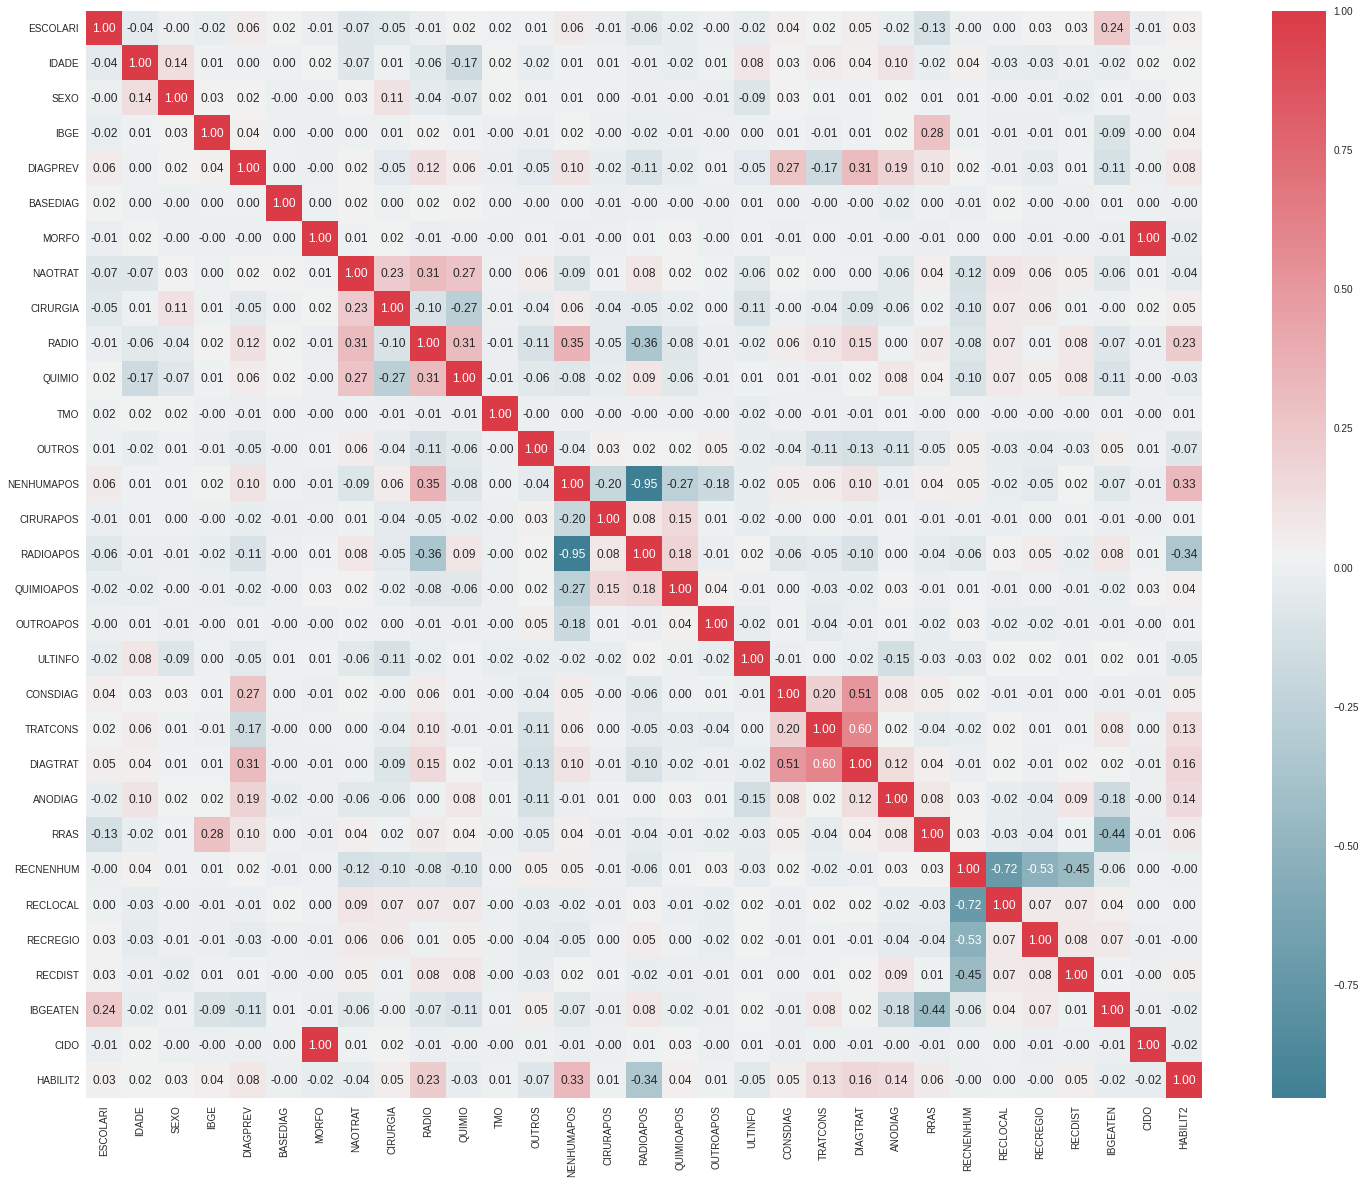

In [376]:
fig, ax = plt.subplots(figsize = (25, 20))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
 
sns.heatmap(df_corr.corr(), cmap = colormap, annot = True, fmt = '.2f')
fig.show()

# **Análise de dados ausentes**

## **Geral**

In [377]:
mis_per = (df.isna().mean()*100).sort_values(ascending=False)
mis_sum = (df.isna().sum()).sort_values(ascending=False)

mis_per = mis_per[mis_per>0]
mis_sum = mis_sum[mis_sum>0]

In [378]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Bar(x=mis_per.index,
                y=mis_per.values,
                marker_color='rgb(0,0,0)'
                ))

fig.update_layout(title = dict(text = 'Porcentagem de valores faltantes por coluna'),
                  xaxis = dict(title='Coluna', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Porcentagem de NaN', titlefont_size=16, tickfont_size=14),
                  barmode='group',
                  bargap=0.15, # gap between bars of adjacent location coordinates.
                  plot_bgcolor='lightgrey'
                  )
fig.show()

In [379]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Bar(x=mis_sum.index,
                y=mis_sum.values,
                marker_color='rgb(0,0,0)'
                ))

fig.update_layout(title = dict(text = 'Quantidade de valores faltantes por coluna'),
                  xaxis = dict(title='Coluna', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Quantidade de NaN', titlefont_size=16, tickfont_size=14),
                  barmode='group',
                  bargap=0.15, # gap between bars of adjacent location coordinates.
                  plot_bgcolor='lightgrey'
                  )
fig.show()

## **Tratamento de ausentes**

# **Análise e pré-processamento de colunas contendo:**

## **Datas**
**Date columns**

* Consulta - $t_1$

* Diagnóstico- $t_2$

* Tratamento - $t_3$

* Recidiva - $t_4$

* Última informação - $t_5$

---

**Diferença, em dias, entre as datas primárias:**

$$DIAGCONS = t_2 - t_1$$

$$TRATDIAG = t_3 - t_2$$

$$TRATCONS = t_3 - t_1$$

**Recidiva:**

$$RECICONS = t_4 - t_1$$

$$RECIDIAG = t_4 - t_2$$

$$RECITRAT = t_4 - t_3$$

**Última informação:**

$$ULTICONS = t_5 - t_1$$

$$ULTIDIAG = t_5 - t_2$$

$$ULTITRAT = t_5 - t_3$$

$$ULTIRECI = t_5 - t_4$$

### **Copiando DataFrame original**

In [380]:
df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,DESCTOPO,MORFO,DESCMORFO,EC,ECGRUP,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFAPOS,CIRURGIA,RADIO,QUIMIO,TMO,OUTROS,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,FAIXAETAR,DRS,RRAS,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT2,CIDADEH
0,9,74,2,PE,SP,3546900,SANTA LUCIA,2,2000-02-08,1,2000-02-08,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,2000-02-17 00:00:00,8,A,A,J,1,0,0,0,0,1,0,0,0,0,0,0,0,2004-06-02 00:00:00,4,0.0,9.0,9.0,2000,70+,DRS 03 ARARAQUARA,13,********,1,0,0,0,NaN,NaN,NaN,NaN,3503208,80703,CARCINOMA ESCAMOCELULAR SOE,1,Araraquara
1,2,69,2,MG,SP,3556503,VARZEA PAULISTA,2,2018-03-13,2,2017-12-12,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,2018-03-13 00:00:00,8,E,E,J,1,0,1,0,0,1,0,0,0,0,0,0,0,2018-08-20 00:00:00,3,91.0,0.0,91.0,2017,60-69,DRS 07 CAMPINAS,16,********,1,0,0,0,NaN,NaN,NaN,NaN,3525904,80703,CARCINOMA ESCAMOCELULAR SOE,1,Jundiai
2,2,65,1,BA,SP,3550308,SAO PAULO,2,2013-06-24,1,2013-07-05,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,III,III,2013-08-29 00:00:00,8,D,D,J,1,1,0,0,0,1,0,0,0,0,0,0,0,2015-11-14 00:00:00,4,11.0,66.0,55.0,2013,60-69,DRS 01 SÃO PAULO,6,2014-06-24 00:00:00,0,1,0,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,1,São Paulo
3,2,72,2,SP,SP,3550308,SAO PAULO,2,2009-06-10,1,2009-07-13,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,II,II,2009-12-21 00:00:00,8,A,A,J,1,0,0,0,0,1,0,0,0,0,0,0,0,2014-03-03 00:00:00,4,33.0,194.0,161.0,2009,70+,DRS 01 SÃO PAULO,6,********,1,0,0,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,2,São Paulo
4,1,78,2,SP,SP,3528502,MAIRIPORA,2,2016-05-10,2,2016-03-16,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,III,III,2016-07-14 00:00:00,8,A,A,J,1,0,0,0,0,1,0,0,0,0,0,0,0,2018-05-14 00:00:00,3,55.0,65.0,120.0,2016,70+,DRS 01 SÃO PAULO,3,********,1,0,0,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,2,São Paulo


In [381]:
df

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,DESCTOPO,MORFO,DESCMORFO,EC,ECGRUP,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFAPOS,CIRURGIA,RADIO,QUIMIO,TMO,OUTROS,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,FAIXAETAR,DRS,RRAS,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT2,CIDADEH
0,9,74,2,PE,SP,3546900,SANTA LUCIA,2,2000-02-08,1,2000-02-08,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,2000-02-17 00:00:00,8,A,A,J,1,0,0,0,0,1,0,0,0,0,0,0,0,2004-06-02 00:00:00,4,0.0,9.0,9.0,2000,70+,DRS 03 ARARAQUARA,13,********,1,0,0,0,NaN,NaN,NaN,NaN,3503208,80703,CARCINOMA ESCAMOCELULAR SOE,1,Araraquara
1,2,69,2,MG,SP,3556503,VARZEA PAULISTA,2,2018-03-13,2,2017-12-12,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,2018-03-13 00:00:00,8,E,E,J,1,0,1,0,0,1,0,0,0,0,0,0,0,2018-08-20 00:00:00,3,91.0,0.0,91.0,2017,60-69,DRS 07 CAMPINAS,16,********,1,0,0,0,NaN,NaN,NaN,NaN,3525904,80703,CARCINOMA ESCAMOCELULAR SOE,1,Jundiai
2,2,65,1,BA,SP,3550308,SAO PAULO,2,2013-06-24,1,2013-07-05,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,III,III,2013-08-29 00:00:00,8,D,D,J,1,1,0,0,0,1,0,0,0,0,0,0,0,2015-11-14 00:00:00,4,11.0,66.0,55.0,2013,60-69,DRS 01 SÃO PAULO,6,2014-06-24 00:00:00,0,1,0,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,1,São Paulo
3,2,72,2,SP,SP,3550308,SAO PAULO,2,2009-06-10,1,2009-07-13,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,II,II,2009-12-21 00:00:00,8,A,A,J,1,0,0,0,0,1,0,0,0,0,0,0,0,2014-03-03 00:00:00,4,33.0,194.0,161.0,2009,70+,DRS 01 SÃO PAULO,6,********,1,0,0,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,2,São Paulo
4,1,78,2,SP,SP,3528502,MAIRIPORA,2,2016-05-10,2,2016-03-16,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,III,III,2016-07-14 00:00:00,8,A,A,J,1,0,0,0,0,1,0,0,0,0,0,0,0,2018-05-14 00:00:00,3,55.0,65.0,120.0,2016,70+,DRS 01 SÃO PAULO,3,********,1,0,0,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,2,São Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12535,2,69,2,PE,SP,3548708,SAO BERNARDO DO CAMPO,2,2012-02-23,1,2012-05-16,3,C109,C10,OROFARINGE SOE,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,2012-05-17 00:00:00,8,A,A,A,1,0,0,0,0,0,1,0,0,0,0,0,0,2021-07-01 00:00:00,4,83.0,84.0,1.0,2012,60-69,DRS 01 SÃO PAULO,1,********,1,0,0,0,NaN,NaN,NaN,NaN,3513801,80703,CARCINOMA ESCAMOCELULAR SOE,3,Diadema
12536,2,47,1,SP,SP,3543303,RIBEIRAO PIRES,2,2013-08-29,1,2013-09-05,3,C109,C10,OROFARINGE SOE,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,********,2,J,J,J,0,0,0,0,0,1,0,0,0,0,0,0,0,2014-09-12 00:00:00,3,7.0,NaN,NaN,2013,40-49,DRS 01 SÃO PAULO,1,********,1,0,0,0,NaN,NaN,NaN,NaN,3513801,80703,CARCINOMA ESCAMOCELULAR SOE,3,Diadema
12537,2,57,1,PE,SP,3529401,MAUA,2,2013-06-06,1,2013-06-12,3,C109,C10,OROFARINGE SOE,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,2013-06-13 00:00:00,8,G,A,F,1,0,0,0,0,0,0,1,1,0,0,0,0,2021-12-21 00:00:00,2,6.0,7.0,1.0,2013,50-59,DRS 01 SÃO PAULO,1,********,1,0,0,0,NaN,NaN,NaN,NaN,3513801,80703,CARCINOMA ESCAMOCELULAR SOE,3,Diadema
12538,2,73,1,SP,SP,3513801,DIADEMA,2,2013-11-14,1,2014-01-22,3,C109,C10,OROFARINGE SOE,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,2014-01-23 00:00:00,8,D,A,B,1,0,0,0,0,0,0,1,0,0,0,0,0,2014-12-27 00:00:00,3,69.0,70.0,1.0,2014,70+,DRS 01 SÃO PAULO,1,********,1,0,0,0,NaN,NaN,NaN,NaN,3513801,80703,CARCINOMA ESCAMOCELULAR SOE,3,Diadema


In [382]:
dates = df[['DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTRECIDIVA', 'DTULTINFO']].copy()
dates.head()

,DTCONSULT,DTDIAG,DTTRAT,DTRECIDIVA,DTULTINFO
0,2000-02-08,2000-02-08,2000-02-17 00:00:00,********,2004-06-02 00:00:00
1,2018-03-13,2017-12-12,2018-03-13 00:00:00,********,2018-08-20 00:00:00
2,2013-06-24,2013-07-05,2013-08-29 00:00:00,2014-06-24 00:00:00,2015-11-14 00:00:00
3,2009-06-10,2009-07-13,2009-12-21 00:00:00,********,2014-03-03 00:00:00
4,2016-05-10,2016-03-16,2016-07-14 00:00:00,********,2018-05-14 00:00:00


### **Quantificando e lidando com os valores NULL, NaN ou ASTERÍSCOS**

In [383]:
dates.isnull().sum()

DTCONSULT     0
DTDIAG        0
DTTRAT        0
DTRECIDIVA    0
DTULTINFO     0
dtype: int64

In [384]:
# Data - DTCONSULT, DTDIAG, DTTRAT, DTULTINFO, DTRECIDIVA
dates.isna().sum()

DTCONSULT     0
DTDIAG        0
DTTRAT        0
DTRECIDIVA    0
DTULTINFO     0
dtype: int64

In [385]:
print("Na coluna DTCONSULT há {} valores completos por asteríscos".format(dates.loc[dates.DTCONSULT == '********'].shape[0]))
print("Na coluna DTDIAG há {} valores completos por asteríscos".format(dates.loc[dates.DTDIAG == '********'].shape[0]))
print("Na coluna DTTRAT há {} valores completos por asteríscos".format(dates.loc[dates.DTTRAT == '********'].shape[0]))
print("Na coluna DTULTINFO há {} valores completos por asteríscos".format(dates.loc[dates.DTULTINFO == '********'].shape[0]))
print("Na coluna DTRECIDIVA há {} valores completos por asteríscos".format(dates.loc[dates.DTRECIDIVA == '********'].shape[0]))

Na coluna DTCONSULT há 0 valores completos por asteríscos
Na coluna DTDIAG há 0 valores completos por asteríscos
Na coluna DTTRAT há 1102 valores completos por asteríscos
Na coluna DTULTINFO há 1 valores completos por asteríscos
Na coluna DTRECIDIVA há 10283 valores completos por asteríscos


In [386]:
dates['DTTRAT'] = np.where(dates.DTTRAT == '********', np.nan, dates.DTTRAT)
dates['DTULTINFO'] = np.where(dates.DTULTINFO == '********', np.nan, dates.DTULTINFO)
dates['DTRECIDIVA'] = np.where(dates.DTRECIDIVA == '********', np.nan, dates.DTRECIDIVA)

dates.head()

,DTCONSULT,DTDIAG,DTTRAT,DTRECIDIVA,DTULTINFO
0,2000-02-08,2000-02-08,2000-02-17 00:00:00,NaN,2004-06-02 00:00:00
1,2018-03-13,2017-12-12,2018-03-13 00:00:00,NaN,2018-08-20 00:00:00
2,2013-06-24,2013-07-05,2013-08-29 00:00:00,2014-06-24 00:00:00,2015-11-14 00:00:00
3,2009-06-10,2009-07-13,2009-12-21 00:00:00,NaN,2014-03-03 00:00:00
4,2016-05-10,2016-03-16,2016-07-14 00:00:00,NaN,2018-05-14 00:00:00


In [387]:
dates.isna().sum()

DTCONSULT         0
DTDIAG            0
DTTRAT         1102
DTRECIDIVA    10283
DTULTINFO         1
dtype: int64

### **Tranformando em datetime**

In [388]:
# Use DataFrame.apply() to convert multiple columns to datetime
dates[['DTCONSULT', 'DTDIAG', 'DTTRAT', 
       'DTRECIDIVA', 'DTULTINFO']] = dates[['DTCONSULT', 'DTDIAG', 'DTTRAT', 
                                            'DTRECIDIVA', 'DTULTINFO']].apply(pd.to_datetime)

### **Cálculando as diferenças entre as datas**

In [389]:
dates['DIAGCONS'] = (dates.DTDIAG - dates.DTCONSULT)/np.timedelta64(1, 'D')
dates['TRATDIAG'] = (dates.DTTRAT - dates.DTDIAG)/np.timedelta64(1, 'D')
dates['TRATCONS'] = (dates.DTTRAT - dates.DTCONSULT)/np.timedelta64(1, 'D')
dates['RECICONS'] = (dates.DTRECIDIVA - dates.DTCONSULT)/np.timedelta64(1, 'D')
dates['RECIDIAG'] = (dates.DTRECIDIVA - dates.DTDIAG)/np.timedelta64(1, 'D')
dates['RECITRAT'] = (dates.DTRECIDIVA - dates.DTTRAT)/np.timedelta64(1, 'D')
dates['ULTICONS'] = (dates.DTULTINFO - dates.DTCONSULT)/np.timedelta64(1, 'D')
dates['ULTIDIAG'] = (dates.DTULTINFO - dates.DTDIAG)/np.timedelta64(1, 'D')
dates['ULTITRAT'] = (dates.DTULTINFO - dates.DTTRAT)/np.timedelta64(1, 'D')
dates['ULTIRECI'] = (dates.DTULTINFO - dates.DTRECIDIVA)/np.timedelta64(1, 'D')

In [390]:
dates.head()

,DTCONSULT,DTDIAG,DTTRAT,DTRECIDIVA,DTULTINFO,DIAGCONS,TRATDIAG,TRATCONS,RECICONS,RECIDIAG,RECITRAT,ULTICONS,ULTIDIAG,ULTITRAT,ULTIRECI
0,2000-02-08,2000-02-08,2000-02-17,NaT,2004-06-02,0.0,9.0,9.0,NaN,NaN,NaN,1576.0,1576.0,1567.0,NaN
1,2018-03-13,2017-12-12,2018-03-13,NaT,2018-08-20,-91.0,91.0,0.0,NaN,NaN,NaN,160.0,251.0,160.0,NaN
2,2013-06-24,2013-07-05,2013-08-29,2014-06-24,2015-11-14,11.0,55.0,66.0,365.0,354.0,299.0,873.0,862.0,807.0,508.0
3,2009-06-10,2009-07-13,2009-12-21,NaT,2014-03-03,33.0,161.0,194.0,NaN,NaN,NaN,1727.0,1694.0,1533.0,NaN
4,2016-05-10,2016-03-16,2016-07-14,NaT,2018-05-14,-55.0,120.0,65.0,NaN,NaN,NaN,734.0,789.0,669.0,NaN


### **Criando as colunas de sobrevida em anos (1, 2, 3, 4 e 5)**

In [391]:
dates['SOBREVIDA_1ANO'] = np.where(dates.ULTIDIAG >= 1.0*365, 1, 0)
dates['SOBREVIDA_2ANO'] = np.where(dates.ULTIDIAG >= 2.0*365, 1, 0)
dates['SOBREVIDA_3ANO'] = np.where(dates.ULTIDIAG >= 3.0*365, 1, 0)
dates['SOBREVIDA_4ANO'] = np.where(dates.ULTIDIAG >= 4.0*365, 1, 0)
dates['SOBREVIDA_5ANO'] = np.where(dates.ULTIDIAG >= 5.0*365, 1, 0)

In [392]:
dates.head()

,DTCONSULT,DTDIAG,DTTRAT,DTRECIDIVA,DTULTINFO,DIAGCONS,TRATDIAG,TRATCONS,RECICONS,RECIDIAG,RECITRAT,ULTICONS,ULTIDIAG,ULTITRAT,ULTIRECI,SOBREVIDA_1ANO,SOBREVIDA_2ANO,SOBREVIDA_3ANO,SOBREVIDA_4ANO,SOBREVIDA_5ANO
0,2000-02-08,2000-02-08,2000-02-17,NaT,2004-06-02,0.0,9.0,9.0,NaN,NaN,NaN,1576.0,1576.0,1567.0,NaN,1,1,1,1,0
1,2018-03-13,2017-12-12,2018-03-13,NaT,2018-08-20,-91.0,91.0,0.0,NaN,NaN,NaN,160.0,251.0,160.0,NaN,0,0,0,0,0
2,2013-06-24,2013-07-05,2013-08-29,2014-06-24,2015-11-14,11.0,55.0,66.0,365.0,354.0,299.0,873.0,862.0,807.0,508.0,1,1,0,0,0
3,2009-06-10,2009-07-13,2009-12-21,NaT,2014-03-03,33.0,161.0,194.0,NaN,NaN,NaN,1727.0,1694.0,1533.0,NaN,1,1,1,1,0
4,2016-05-10,2016-03-16,2016-07-14,NaT,2018-05-14,-55.0,120.0,65.0,NaN,NaN,NaN,734.0,789.0,669.0,NaN,1,1,0,0,0


### **Retomando o DataFrame de trabalho com as novas colunas**

In [393]:
df = df.drop(['DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTULTINFO', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'DTRECIDIVA'], axis=1)

In [394]:
df = df.merge(dates, left_index=True, right_index=True)
df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DIAGPREV,BASEDIAG,TOPO,TOPOGRUP,DESCTOPO,MORFO,DESCMORFO,EC,ECGRUP,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFAPOS,CIRURGIA,RADIO,QUIMIO,TMO,OUTROS,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,ANODIAG,FAIXAETAR,DRS,RRAS,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT2,CIDADEH,DTCONSULT,DTDIAG,DTTRAT,DTRECIDIVA,DTULTINFO,DIAGCONS,TRATDIAG,TRATCONS,RECICONS,RECIDIAG,RECITRAT,ULTICONS,ULTIDIAG,ULTITRAT,ULTIRECI,SOBREVIDA_1ANO,SOBREVIDA_2ANO,SOBREVIDA_3ANO,SOBREVIDA_4ANO,SOBREVIDA_5ANO
0,9,74,2,PE,SP,3546900,SANTA LUCIA,2,1,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,8,A,A,J,1,0,0,0,0,1,0,0,0,0,0,0,0,4,2000,70+,DRS 03 ARARAQUARA,13,1,0,0,0,NaN,NaN,NaN,NaN,3503208,80703,CARCINOMA ESCAMOCELULAR SOE,1,Araraquara,2000-02-08,2000-02-08,2000-02-17,NaT,2004-06-02,0.0,9.0,9.0,NaN,NaN,NaN,1576.0,1576.0,1567.0,NaN,1,1,1,1,0
1,2,69,2,MG,SP,3556503,VARZEA PAULISTA,2,2,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,I,I,8,E,E,J,1,0,1,0,0,1,0,0,0,0,0,0,0,3,2017,60-69,DRS 07 CAMPINAS,16,1,0,0,0,NaN,NaN,NaN,NaN,3525904,80703,CARCINOMA ESCAMOCELULAR SOE,1,Jundiai,2018-03-13,2017-12-12,2018-03-13,NaT,2018-08-20,-91.0,91.0,0.0,NaN,NaN,NaN,160.0,251.0,160.0,NaN,0,0,0,0,0
2,2,65,1,BA,SP,3550308,SAO PAULO,2,1,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,III,III,8,D,D,J,1,1,0,0,0,1,0,0,0,0,0,0,0,4,2013,60-69,DRS 01 SÃO PAULO,6,0,1,0,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,1,São Paulo,2013-06-24,2013-07-05,2013-08-29,2014-06-24,2015-11-14,11.0,55.0,66.0,365.0,354.0,299.0,873.0,862.0,807.0,508.0,1,1,0,0,0
3,2,72,2,SP,SP,3550308,SAO PAULO,2,1,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,II,II,8,A,A,J,1,0,0,0,0,1,0,0,0,0,0,0,0,4,2009,70+,DRS 01 SÃO PAULO,6,1,0,0,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,2,São Paulo,2009-06-10,2009-07-13,2009-12-21,NaT,2014-03-03,33.0,161.0,194.0,NaN,NaN,NaN,1727.0,1694.0,1533.0,NaN,1,1,1,1,0
4,1,78,2,SP,SP,3528502,MAIRIPORA,2,2,3,C003,C00,LABIO MUCOSA SUPERIOR DO,80703,CARCINOMA ESCAMOCELULAR SOE,III,III,8,A,A,J,1,0,0,0,0,1,0,0,0,0,0,0,0,3,2016,70+,DRS 01 SÃO PAULO,3,1,0,0,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,2,São Paulo,2016-05-10,2016-03-16,2016-07-14,NaT,2018-05-14,-55.0,120.0,65.0,NaN,NaN,NaN,734.0,789.0,669.0,NaN,1,1,0,0,0


### **Análise** FALTANDO

## **Numéricas**

### **Separando o DataFrame com colunas numéricas**

In [395]:
num_df = df.select_dtypes(include = np.number, exclude = None).copy()
num_df.head()

,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,BASEDIAG,MORFO,NAOTRAT,CIRURGIA,RADIO,QUIMIO,TMO,OUTROS,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,ANODIAG,RRAS,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,IBGEATEN,CIDO,HABILIT2,DIAGCONS,TRATDIAG,TRATCONS,RECICONS,RECIDIAG,RECITRAT,ULTICONS,ULTIDIAG,ULTITRAT,ULTIRECI,SOBREVIDA_1ANO,SOBREVIDA_2ANO,SOBREVIDA_3ANO,SOBREVIDA_4ANO,SOBREVIDA_5ANO
0,9,74,2,3546900,2,1,3,80703,8,1,0,0,0,0,1,0,0,0,0,0,0,0,4,2000,13,1,0,0,0,3503208,80703,1,0.0,9.0,9.0,NaN,NaN,NaN,1576.0,1576.0,1567.0,NaN,1,1,1,1,0
1,2,69,2,3556503,2,2,3,80703,8,1,0,1,0,0,1,0,0,0,0,0,0,0,3,2017,16,1,0,0,0,3525904,80703,1,-91.0,91.0,0.0,NaN,NaN,NaN,160.0,251.0,160.0,NaN,0,0,0,0,0
2,2,65,1,3550308,2,1,3,80703,8,1,1,0,0,0,1,0,0,0,0,0,0,0,4,2013,6,0,1,0,0,3550308,80703,1,11.0,55.0,66.0,365.0,354.0,299.0,873.0,862.0,807.0,508.0,1,1,0,0,0
3,2,72,2,3550308,2,1,3,80703,8,1,0,0,0,0,1,0,0,0,0,0,0,0,4,2009,6,1,0,0,0,3550308,80703,2,33.0,161.0,194.0,NaN,NaN,NaN,1727.0,1694.0,1533.0,NaN,1,1,1,1,0
4,1,78,2,3528502,2,2,3,80703,8,1,0,0,0,0,1,0,0,0,0,0,0,0,3,2016,3,1,0,0,0,3550308,80703,2,-55.0,120.0,65.0,NaN,NaN,NaN,734.0,789.0,669.0,NaN,1,1,0,0,0


In [396]:
num_df.shape

(12523, 47)

In [397]:
num_df.columns

Index(['ESCOLARI', 'IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV',
       'BASEDIAG', 'MORFO', 'NAOTRAT', 'CIRURGIA', 'RADIO', 'QUIMIO', 'TMO',
       'OUTROS', 'NENHUMAPOS', 'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS',
       'HORMOAPOS', 'TMOAPOS', 'IMUNOAPOS', 'OUTROAPOS', 'ULTINFO', 'ANODIAG',
       'RRAS', 'RECNENHUM', 'RECLOCAL', 'RECREGIO', 'RECDIST', 'IBGEATEN',
       'CIDO', 'HABILIT2', 'DIAGCONS', 'TRATDIAG', 'TRATCONS', 'RECICONS',
       'RECIDIAG', 'RECITRAT', 'ULTICONS', 'ULTIDIAG', 'ULTITRAT', 'ULTIRECI',
       'SOBREVIDA_1ANO', 'SOBREVIDA_2ANO', 'SOBREVIDA_3ANO', 'SOBREVIDA_4ANO',
       'SOBREVIDA_5ANO'],
      dtype='object')

### **ULTINFO** - DROP

In [398]:
num_df.ULTINFO.value_counts(dropna = False).sort_index()

1     546
2    2752
3    7221
4    2004
Name: ULTINFO, dtype: int64

In [399]:
num_df['OBITO_CANCER'] = np.where(num_df.ULTINFO == 3, 1, 0)
num_df['OBITO_GERAL'] = np.where(num_df.ULTINFO >= 3, 1, 0)

In [400]:
num_df.OBITO_CANCER.value_counts(dropna = False).sort_index()

0    5302
1    7221
Name: OBITO_CANCER, dtype: int64

In [401]:
num_df.OBITO_GERAL.value_counts(dropna = False).sort_index()

0    3298
1    9225
Name: OBITO_GERAL, dtype: int64

In [402]:
num_df = num_df.drop(['ULTINFO'], axis=1)

### **ESCOLARI** - !ONE_HOT_ENCODER

In [403]:
num_df.ESCOLARI.value_counts(dropna = False).sort_index()

1     728
2    4558
3    2750
4    1221
5     259
9    3007
Name: ESCOLARI, dtype: int64

In [404]:
num_df['ESCOLARI'] = np.where(num_df.ESCOLARI == 9, np.nan, num_df.ESCOLARI)

In [405]:
num_df.ESCOLARI.value_counts(dropna = False).sort_index()

1.0     728
2.0    4558
3.0    2750
4.0    1221
5.0     259
NaN    3007
Name: ESCOLARI, dtype: int64

### **IDADE** - !DROP

In [406]:
num_df.IDADE.value_counts(dropna = False).sort_index()

11       1
15       1
16       2
18       1
20       3
21       3
22       6
23       2
24       5
25       3
26       5
27       6
28       5
29       4
30      11
31       8
32      12
33      13
34      17
35      24
36      28
37      31
38      46
39      55
40      66
41      88
42     139
43     122
44     181
45     211
46     228
47     271
48     290
49     322
50     374
51     393
52     416
53     480
54     464
55     463
56     537
57     493
58     474
59     491
60     469
61     471
62     477
63     379
64     361
65     365
66     336
67     301
68     260
69     255
70     255
71     207
72     199
73     175
74     156
75     139
76     129
77     109
78     106
79      92
80      74
81      56
82      53
83      56
84      46
85      52
86      32
87      25
88      17
89      18
90      16
91      13
92      10
93       6
94       5
95       2
98       4
100      2
Name: IDADE, dtype: int64

In [407]:
import plotly.graph_objects as go

vc_idade = num_df.IDADE.value_counts(dropna = False).sort_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=vc_idade.index,
                y=vc_idade.values,
                marker_color='rgb(0,0,0)'
                ))

fig.update_layout(title = dict(text = 'Quantidade de pessoas com câncer por idade'),
                  xaxis = dict(title='Idade', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Quantidade de pessoas', titlefont_size=16, tickfont_size=14),
                  barmode='group',
                  bargap=0.15, # gap between bars of adjacent location coordinates.
                  plot_bgcolor='lightgrey'
                  )
fig.show()

In [408]:
num_df = num_df.drop(['IDADE'], axis=1)

### **SEXO** - CONTINUA BINÁRIA

In [409]:
num_df.SEXO.value_counts(dropna = False).sort_index()

1    10521
2     2002
Name: SEXO, dtype: int64

In [410]:
num_df['SEXO'] = np.where(num_df.SEXO == 2, 1, 0)

In [411]:
num_df.SEXO.value_counts(dropna = False).sort_index()

0    10521
1     2002
Name: SEXO, dtype: int64

### **IBGE** - !DROP

In [412]:
num_df.IBGE.value_counts(dropna = False).sort_index()

1100015    1
1100098    1
1100114    1
1100122    2
1100205    2
          ..
5219308    2
5219712    1
5220405    2
5222054    3
5300108    9
Name: IBGE, Length: 812, dtype: int64

In [413]:
num_df = num_df.drop(['IBGE'], axis=1)

### **IBGEATEN** - !DROP

In [414]:
num_df.IBGEATEN.value_counts(dropna = False).sort_index()

3502804     118
3503208     132
3503307      37
3504008       6
3504503       3
3505500    1277
3506003     173
3507506     239
3507605       1
3509502     242
3511102       1
3513801      52
3516200      61
3518404      25
3518701      12
3522406       2
3524808       6
3525300    1041
3525904     317
3526902      29
3529005     156
3530607       2
3530706      30
3534708       1
3536208      15
3538709      82
3541406     105
3543402     527
3543907      70
3547809      28
3548500     140
3548708      37
3548807       5
3548906      16
3549805     923
3549904      14
3550308    6066
3552205     204
3552809      71
3554102     216
3555000      41
Name: IBGEATEN, dtype: int64

In [415]:
num_df = num_df.drop(['IBGEATEN'], axis=1)

### **CATEATEND** - DROP

In [416]:
num_df.CATEATEND.value_counts(dropna = False).sort_index()

2    12523
Name: CATEATEND, dtype: int64

In [417]:
num_df = num_df.drop(['CATEATEND'], axis=1)

### **DIAGPREV** - CONTINUA BINÁRIA

In [418]:
num_df.DIAGPREV.value_counts(dropna = False).sort_index()

1    6038
2    6485
Name: DIAGPREV, dtype: int64

In [419]:
num_df['DIAGPREV'] = np.where(num_df.DIAGPREV == 2, 1, 0)

### **BASEDIAG** - !ONE_HOT_ENCODER

In [420]:
num_df.BASEDIAG.value_counts(dropna = False).sort_index()

1       36
2       34
3    12442
9       11
Name: BASEDIAG, dtype: int64

In [421]:
num_df['BASEDIAG'] = np.where(num_df.BASEDIAG == 9, np.nan, num_df.BASEDIAG)

In [422]:
num_df.BASEDIAG.value_counts(dropna = False).sort_index()

1.0       36
2.0       34
3.0    12442
NaN       11
Name: BASEDIAG, dtype: int64

### **MORFO** - !ONE_HOT_ENCODER

In [423]:
num_df.MORFO.value_counts(dropna = False).sort_index()

80703    12489
80723       13
80733        8
80743       13
Name: MORFO, dtype: int64

### **CIDO** - DROP

In [424]:
num_df.CIDO.value_counts(dropna = False).sort_index()

80703    12489
80723       13
80733        8
80743       13
Name: CIDO, dtype: int64

In [425]:
num_df = num_df.drop(['CIDO'], axis=1)

### **NAOTRAT** - !DROP

In [426]:
num_df.NAOTRAT.value_counts(dropna = False).sort_index()

1       37
2      388
3       26
4       43
5      359
6       26
7      224
8    11420
Name: NAOTRAT, dtype: int64

In [427]:
num_df['TRATADO'] = np.where(num_df.NAOTRAT == 8, 1, 0)
num_df['TRATADO'] = np.where(num_df.NAOTRAT == 9, np.nan, num_df.TRATADO)

In [428]:
num_df.TRATADO.value_counts(dropna = False).sort_index()

0.0     1103
1.0    11420
Name: TRATADO, dtype: int64

In [429]:
num_df = num_df.drop(['NAOTRAT'], axis=1)

### **BINÁRIOS - TRATAMENTO**:

*   NENHUM   ????????????????
*   CIRURGIA
*   RADIO
*   QUIMIO
*   HORMONIO ????????????????
*   TMO
*   OUTROS
*   NENHUMAPOS
*   CIRURAPOS
*   RADIOAPOS
*   QUIMIOAPOS
*   HORMOAPOS
*   TMOAPOS
*   OUTROAPOS

In [430]:
num_df[['CIRURGIA', 'RADIO', 'QUIMIO', 'TMO', 'OUTROS', 'NENHUMAPOS', 
        'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS', 'HORMOAPOS', 'TMOAPOS',
        'IMUNOAPOS', 'OUTROAPOS']]

,CIRURGIA,RADIO,QUIMIO,TMO,OUTROS,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS
0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,1,0,0,1,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12535,1,0,0,0,0,0,1,0,0,0,0,0,0
12536,0,0,0,0,0,1,0,0,0,0,0,0,0
12537,1,0,0,0,0,0,0,1,1,0,0,0,0
12538,1,0,0,0,0,0,0,1,0,0,0,0,0


### **ANODIAG** - !DROP

In [431]:
num_df.ANODIAG.value_counts(dropna = False).sort_index()

2000     194
2001     152
2002     180
2003     204
2004     227
2005     264
2006     254
2007     265
2008     342
2009     315
2010     375
2011     680
2012    1041
2013    1520
2014    1526
2015    1606
2016    1728
2017    1650
Name: ANODIAG, dtype: int64

In [432]:
num_df = num_df.drop(['ANODIAG'], axis=1)

### **RRAS** - !DROP

In [433]:
num_df.RRAS.value_counts(dropna = False).sort_index()

1      498
2      498
3      127
4      398
5      570
6     3875
7      287
8      417
9      746
10     441
11     189
12    1391
13    1173
14     272
15     470
16     367
17     287
99     517
Name: RRAS, dtype: int64

In [434]:
num_df = num_df.drop(['RRAS'], axis=1)

### **BINÁRIOS - RECIDIVA:**


*   RECNENHUM
*   RECLOCAL
*   RECREGIO
*   RECDIST

In [435]:
num_df[['RECNENHUM', 'RECLOCAL', 'RECREGIO', 'RECDIST']]

,RECNENHUM,RECLOCAL,RECREGIO,RECDIST
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
12535,1,0,0,0
12536,1,0,0,0
12537,1,0,0,0
12538,1,0,0,0


### **HABILIT2** - !ONE_HOT_ENCODER

In [436]:
num_df.HABILIT2.value_counts(dropna = False).sort_index()

1    4350
2    8049
3     124
Name: HABILIT2, dtype: int64

### **DIFERENÇAS ENTRE DATAS:** - AVALIAR


In [437]:
num_df[['DIAGCONS', 'TRATDIAG', 'TRATCONS', 'RECICONS', 
        'RECIDIAG', 'RECITRAT', 'ULTICONS', 'ULTIDIAG', 
        'ULTITRAT', 'ULTIRECI']]

,DIAGCONS,TRATDIAG,TRATCONS,RECICONS,RECIDIAG,RECITRAT,ULTICONS,ULTIDIAG,ULTITRAT,ULTIRECI
0,0.0,9.0,9.0,NaN,NaN,NaN,1576.0,1576.0,1567.0,NaN
1,-91.0,91.0,0.0,NaN,NaN,NaN,160.0,251.0,160.0,NaN
2,11.0,55.0,66.0,365.0,354.0,299.0,873.0,862.0,807.0,508.0
3,33.0,161.0,194.0,NaN,NaN,NaN,1727.0,1694.0,1533.0,NaN
4,-55.0,120.0,65.0,NaN,NaN,NaN,734.0,789.0,669.0,NaN
...,...,...,...,...,...,...,...,...,...,...
12535,83.0,1.0,84.0,NaN,NaN,NaN,3416.0,3333.0,3332.0,NaN
12536,7.0,NaN,NaN,NaN,NaN,NaN,379.0,372.0,NaN,NaN
12537,6.0,1.0,7.0,NaN,NaN,NaN,3120.0,3114.0,3113.0,NaN
12538,69.0,1.0,70.0,NaN,NaN,NaN,408.0,339.0,338.0,NaN


### **PERÍODOS DE SOBREVIDA:**

*   SOBREVIDA_1ANO
*   SOBREVIDA_2ANO
*   SOBREVIDA_3ANO
*   SOBREVIDA_4ANO
*   SOBREVIDA_5ANO

In [438]:
num_df[['SOBREVIDA_1ANO', 'SOBREVIDA_2ANO', 'SOBREVIDA_3ANO', 'SOBREVIDA_4ANO', 'SOBREVIDA_5ANO']]

,SOBREVIDA_1ANO,SOBREVIDA_2ANO,SOBREVIDA_3ANO,SOBREVIDA_4ANO,SOBREVIDA_5ANO
0,1,1,1,1,0
1,0,0,0,0,0
2,1,1,0,0,0
3,1,1,1,1,0
4,1,1,0,0,0
...,...,...,...,...,...
12535,1,1,1,1,1
12536,1,0,0,0,0
12537,1,1,1,1,1
12538,0,0,0,0,0


## **Não-numéricas**

### **Separando o DataFrame com colunas não-numéricas**

In [439]:
alp_df = df.select_dtypes(include = None, exclude = np.number).copy()
alp_df.head()

,UFNASC,UFRESID,CIDADE,TOPO,TOPOGRUP,DESCTOPO,DESCMORFO,EC,ECGRUP,TRATAMENTO,TRATHOSP,TRATFAPOS,FAIXAETAR,DRS,REC01,REC02,REC03,REC04,DSCCIDO,CIDADEH,DTCONSULT,DTDIAG,DTTRAT,DTRECIDIVA,DTULTINFO
0,PE,SP,SANTA LUCIA,C003,C00,LABIO MUCOSA SUPERIOR DO,CARCINOMA ESCAMOCELULAR SOE,I,I,A,A,J,70+,DRS 03 ARARAQUARA,NaN,NaN,NaN,NaN,CARCINOMA ESCAMOCELULAR SOE,Araraquara,2000-02-08,2000-02-08,2000-02-17,NaT,2004-06-02
1,MG,SP,VARZEA PAULISTA,C003,C00,LABIO MUCOSA SUPERIOR DO,CARCINOMA ESCAMOCELULAR SOE,I,I,E,E,J,60-69,DRS 07 CAMPINAS,NaN,NaN,NaN,NaN,CARCINOMA ESCAMOCELULAR SOE,Jundiai,2018-03-13,2017-12-12,2018-03-13,NaT,2018-08-20
2,BA,SP,SAO PAULO,C003,C00,LABIO MUCOSA SUPERIOR DO,CARCINOMA ESCAMOCELULAR SOE,III,III,D,D,J,60-69,DRS 01 SÃO PAULO,NaN,NaN,NaN,NaN,CARCINOMA ESCAMOCELULAR SOE,São Paulo,2013-06-24,2013-07-05,2013-08-29,2014-06-24,2015-11-14
3,SP,SP,SAO PAULO,C003,C00,LABIO MUCOSA SUPERIOR DO,CARCINOMA ESCAMOCELULAR SOE,II,II,A,A,J,70+,DRS 01 SÃO PAULO,NaN,NaN,NaN,NaN,CARCINOMA ESCAMOCELULAR SOE,São Paulo,2009-06-10,2009-07-13,2009-12-21,NaT,2014-03-03
4,SP,SP,MAIRIPORA,C003,C00,LABIO MUCOSA SUPERIOR DO,CARCINOMA ESCAMOCELULAR SOE,III,III,A,A,J,70+,DRS 01 SÃO PAULO,NaN,NaN,NaN,NaN,CARCINOMA ESCAMOCELULAR SOE,São Paulo,2016-05-10,2016-03-16,2016-07-14,NaT,2018-05-14


In [440]:
alp_df.shape

(12523, 25)

In [441]:
alp_df.columns

Index(['UFNASC', 'UFRESID', 'CIDADE', 'TOPO', 'TOPOGRUP', 'DESCTOPO',
       'DESCMORFO', 'EC', 'ECGRUP', 'TRATAMENTO', 'TRATHOSP', 'TRATFAPOS',
       'FAIXAETAR', 'DRS', 'REC01', 'REC02', 'REC03', 'REC04', 'DSCCIDO',
       'CIDADEH', 'DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTRECIDIVA', 'DTULTINFO'],
      dtype='object')

### **UFNASC** - !DROP

In [442]:
alp_df.UFNASC.value_counts(dropna = False).sort_index()

AC       3
AL     167
AM       2
AP       1
BA     929
CE     244
DF       3
ES      35
GO      98
MA      28
MG    1030
MS      67
MT      32
OP      67
PA      30
PB     147
PE     464
PI      68
PR     372
RJ      54
RN      53
RO       3
RR       2
RS      45
SC      34
SE      74
SI     453
SP    8005
TO      13
Name: UFNASC, dtype: int64

In [443]:
alp_df = alp_df.drop(['UFNASC'], axis=1)

### **UFRESID** - !DROP

In [444]:
alp_df.UFRESID.value_counts(dropna = False).sort_index()

AP        1
BA       12
CE        2
DF        9
ES        1
GO      111
MA        4
MG      193
MS       71
MT       50
PA       13
PB        2
PE        3
PI        1
PR        3
RJ        3
RO       11
RR        1
RS        4
SC        1
SE        3
SP    12006
TO       18
Name: UFRESID, dtype: int64

In [445]:
alp_df = alp_df.drop(['UFRESID'], axis=1)

### **CIDADE** - !DROP

In [446]:
alp_df.CIDADE.value_counts(dropna = False).sort_index()

ABADIA DOS DOURADOS     3
ACREUNA                 2
ADAMANTINA             19
ADOLFO                  5
AFONSO CLAUDIO          1
                       ..
VITORIA BRASIL          1
VOTORANTIM             16
VOTUPORANGA            60
XINGUARA                2
ZACARIAS                3
Name: CIDADE, Length: 808, dtype: int64

In [447]:
alp_df = alp_df.drop(['CIDADE'], axis=1)

### **CIDADEH** - !DROP

In [448]:
alp_df.CIDADEH.value_counts(dropna = False).sort_index()

Araraquara                 132
Araras                      37
Araçatuba                  118
Assis                        6
Avaré                        3
Barretos                  1277
Bauru                      173
Botucatu                   239
Bragança Paulista            1
Campinas                   242
Catanduva                    1
Diadema                     52
Franca                      61
Guaratingueta               25
Guarujá                     12
Itapeva                      2
Jales                        6
Jau                       1041
Jundiai                    317
Limeira                     29
Marilia                    156
Mogi das Cruzes              2
Mogi-Guaçu                  30
Ourinhos                     1
Periquera-açu               15
Piracicaba                  82
Pres. Prudente             105
Ribeirão Preto             527
Rio Claro                   70
Santo André                 28
Santos                     140
Sorocaba                   204
São Bern

In [449]:
alp_df = alp_df.drop(['CIDADEH'], axis=1)

### **TOPO** - !DROP

In [450]:
alp_df.TOPO.value_counts(dropna = False).sort_index()

C003       6
C004      61
C005      12
C006      32
C008       6
C009      60
C019    1751
C020     110
C021     979
C022      61
C023      31
C028     101
C029    1459
C030      56
C031     178
C039      78
C040     222
C041     113
C048      77
C049     959
C050     215
C051     748
C052     120
C058      52
C059     168
C060     208
C061      20
C062     497
C068      16
C069     513
C090     200
C091     265
C098      59
C099     703
C100     128
C101      56
C102     233
C103      88
C108     253
C109    1629
Name: TOPO, dtype: int64

In [451]:
alp_df = alp_df.drop(['TOPO'], axis=1)

### **TOPOGRUP** - !ONE_HOT_ENCODER

In [452]:
alp_df.TOPOGRUP.value_counts(dropna = False).sort_index()

C00     177
C01    1751
C02    2741
C03     312
C04    1371
C05    1303
C06    1254
C09    1227
C10    2387
Name: TOPOGRUP, dtype: int64

### **DESCTOPO** - DROP

In [453]:
alp_df = alp_df.drop(['DESCTOPO'], axis=1)

### **DESCMORFO** - DROP

In [454]:
alp_df = alp_df.drop(['DESCMORFO'], axis=1)

### **EC** - !DROP

In [455]:
alp_df.EC.value_counts(dropna = False).sort_index()

I      1249
II     1382
III    1766
IV        3
IVA    5366
IVB    2045
IVC     712
Name: EC, dtype: int64

In [456]:
alp_df = alp_df.drop(['EC'], axis=1)

### **ECGRUP** - !ONE_HOT_ENCODER

In [457]:
alp_df.ECGRUP.value_counts(dropna = False).sort_index()

I      1249
II     1382
III    1766
IV     8126
Name: ECGRUP, dtype: int64

In [458]:
alp_df['ECGRUP'] = np.where(alp_df.ECGRUP == 'I', 1, alp_df.ECGRUP)
alp_df['ECGRUP'] = np.where(alp_df.ECGRUP == 'II', 2, alp_df.ECGRUP)
alp_df['ECGRUP'] = np.where(alp_df.ECGRUP == 'III', 3, alp_df.ECGRUP)
alp_df['ECGRUP'] = np.where(alp_df.ECGRUP == 'IV', 4, alp_df.ECGRUP)

In [459]:
alp_df.ECGRUP.value_counts(dropna = False).sort_index()

1    1249
2    1382
3    1766
4    8126
Name: ECGRUP, dtype: int64

### **TRATAMENTO** - !DROP

In [460]:
alp_df.TRATAMENTO.value_counts(dropna = False).sort_index()

A    1877
B    1417
C     758
D    1403
E     226
F    3637
G    1536
H       1
I     582
J    1086
Name: TRATAMENTO, dtype: int64

In [461]:
alp_df = alp_df.drop(['TRATAMENTO'], axis=1)

### **TRATHOSP** - !DROP

In [462]:
alp_df.TRATHOSP.value_counts(dropna = False).sort_index()

A    2081
B    1265
C    1298
D    1226
E     416
F    3086
G    1293
H       1
I     542
J    1315
Name: TRATHOSP, dtype: int64

In [463]:
alp_df = alp_df.drop(['TRATHOSP'], axis=1)

### **TRATFAPOS** - !DROP

In [464]:
alp_df.TRATFAPOS.value_counts(dropna = False).sort_index()

A       31
B     1158
C       30
D       18
E        2
F       62
G       10
I       50
J    11162
Name: TRATFAPOS, dtype: int64

In [465]:
alp_df = alp_df.drop(['TRATFAPOS'], axis=1)

### **FAIXAETAR** - !ONE_HOT_ENCODER

In [466]:
alp_df.FAIXAETAR.value_counts(dropna = False).sort_index()

10-19       5
20-29      42
30-39     245
40-49    1918
50-59    4585
60-69    3674
70+      2054
Name: FAIXAETAR, dtype: int64

### **DRS** - DROP

In [467]:
alp_df.DRS.value_counts(dropna = False).sort_index()

DRS 01  SÃO PAULO                5966
DRS 02  ARAÇATUBA                 262
DRS 03  ARARAQUARA                268
DRS 04  SANTOS                    238
DRS 05  BARRETOS                  263
DRS 06  BAURU                     746
DRS 07  CAMPINAS                  613
DRS 08  FRANCA                    141
DRS 09  MARÍLIA                   441
DRS 10  PIRACICABA                272
DRS 11  PRESIDENTE PRUDENTE       201
DRS 12  REGISTRO                   49
DRS 13  RIBEIRÃO PRETO            503
DRS 14  SÃO JOÃO DA BOA VISTA     224
DRS 15  SÃO JOSÉ DO RIO PRETO    1115
DRS 16  SOROCABA                  417
DRS 17  TAUBATÉ                   287
NaN                               517
Name: DRS, dtype: int64

In [468]:
alp_df = alp_df.drop(['DRS'], axis=1)

### **RECs:** - DROP

*   REC01
*   REC02
*   REC03
*   REC04



In [469]:
alp_df = alp_df.drop(['REC01'], axis=1)
alp_df = alp_df.drop(['REC02'], axis=1)
alp_df = alp_df.drop(['REC03'], axis=1)
alp_df = alp_df.drop(['REC04'], axis=1)

### **DSCCIDO** - DROP

In [470]:
alp_df.DSCCIDO.value_counts(dropna = False).sort_index()

CARCINOMA ESCAMOCELULAR SOE                                   12489
CARCINOMA ESCAMOSO DE CELULAS FUSIFORMES                         13
CARCINOMA ESCAMOSO DE CELULAS GRANDES NAO CERATINIZADO SOE       13
CARCINOMA ESCAMOSO DE CELULAS PEQUENAS NAO CERATINIZADO           8
Name: DSCCIDO, dtype: int64

In [471]:
alp_df = alp_df.drop(['DSCCIDO'], axis=1)

### **DATAS:** - DROP

*   DTCONSULT
*   DTDIAG
*   DTTRAT
*   DTRECIDIVA
*   DTULTINFO

In [472]:
alp_df.TOPOGRUP.value_counts(dropna = False).sort_index()

C00     177
C01    1751
C02    2741
C03     312
C04    1371
C05    1303
C06    1254
C09    1227
C10    2387
Name: TOPOGRUP, dtype: int64

In [473]:
alp_df = alp_df.drop(['DTCONSULT'], axis=1)
alp_df = alp_df.drop(['DTDIAG'], axis=1)
alp_df = alp_df.drop(['DTTRAT'], axis=1)
alp_df = alp_df.drop(['DTRECIDIVA'], axis=1)
alp_df = alp_df.drop(['DTULTINFO'], axis=1)

# **DataFrame final**

## **União do alp_df (não-numéricos) com num_df (numéricos)**

In [474]:
alp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12523 entries, 0 to 12539
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TOPOGRUP   12523 non-null  object
 1   ECGRUP     12523 non-null  object
 2   FAIXAETAR  12523 non-null  object
dtypes: object(3)
memory usage: 649.4+ KB


In [475]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12523 entries, 0 to 12539
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ESCOLARI        9516 non-null   float64
 1   SEXO            12523 non-null  int64  
 2   DIAGPREV        12523 non-null  int64  
 3   BASEDIAG        12512 non-null  float64
 4   MORFO           12523 non-null  int64  
 5   CIRURGIA        12523 non-null  int64  
 6   RADIO           12523 non-null  int64  
 7   QUIMIO          12523 non-null  int64  
 8   TMO             12523 non-null  int64  
 9   OUTROS          12523 non-null  int64  
 10  NENHUMAPOS      12523 non-null  int64  
 11  CIRURAPOS       12523 non-null  int64  
 12  RADIOAPOS       12523 non-null  int64  
 13  QUIMIOAPOS      12523 non-null  int64  
 14  HORMOAPOS       12523 non-null  int64  
 15  TMOAPOS         12523 non-null  int64  
 16  IMUNOAPOS       12523 non-null  int64  
 17  OUTROAPOS       12523 non-null 

In [476]:
proc_df = alp_df.merge(num_df, left_index=True, right_index=True).copy()
proc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12523 entries, 0 to 12539
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TOPOGRUP        12523 non-null  object 
 1   ECGRUP          12523 non-null  object 
 2   FAIXAETAR       12523 non-null  object 
 3   ESCOLARI        9516 non-null   float64
 4   SEXO            12523 non-null  int64  
 5   DIAGPREV        12523 non-null  int64  
 6   BASEDIAG        12512 non-null  float64
 7   MORFO           12523 non-null  int64  
 8   CIRURGIA        12523 non-null  int64  
 9   RADIO           12523 non-null  int64  
 10  QUIMIO          12523 non-null  int64  
 11  TMO             12523 non-null  int64  
 12  OUTROS          12523 non-null  int64  
 13  NENHUMAPOS      12523 non-null  int64  
 14  CIRURAPOS       12523 non-null  int64  
 15  RADIOAPOS       12523 non-null  int64  
 16  QUIMIOAPOS      12523 non-null  int64  
 17  HORMOAPOS       12523 non-null 

## **ONE_HOT_ENCODER**

In [477]:
proc_df.columns

Index(['TOPOGRUP', 'ECGRUP', 'FAIXAETAR', 'ESCOLARI', 'SEXO', 'DIAGPREV',
       'BASEDIAG', 'MORFO', 'CIRURGIA', 'RADIO', 'QUIMIO', 'TMO', 'OUTROS',
       'NENHUMAPOS', 'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS', 'HORMOAPOS',
       'TMOAPOS', 'IMUNOAPOS', 'OUTROAPOS', 'RECNENHUM', 'RECLOCAL',
       'RECREGIO', 'RECDIST', 'HABILIT2', 'DIAGCONS', 'TRATDIAG', 'TRATCONS',
       'RECICONS', 'RECIDIAG', 'RECITRAT', 'ULTICONS', 'ULTIDIAG', 'ULTITRAT',
       'ULTIRECI', 'SOBREVIDA_1ANO', 'SOBREVIDA_2ANO', 'SOBREVIDA_3ANO',
       'SOBREVIDA_4ANO', 'SOBREVIDA_5ANO', 'OBITO_CANCER', 'OBITO_GERAL',
       'TRATADO'],
      dtype='object')

In [478]:
#categorical data
categorical_cols = ['TOPOGRUP', 'ECGRUP', 'FAIXAETAR', 'ESCOLARI', 'BASEDIAG', 'HABILIT2']

#import pandas as pd
df = pd.get_dummies(proc_df, columns = categorical_cols)
df.columns

Index(['SEXO', 'DIAGPREV', 'MORFO', 'CIRURGIA', 'RADIO', 'QUIMIO', 'TMO',
       'OUTROS', 'NENHUMAPOS', 'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS',
       'HORMOAPOS', 'TMOAPOS', 'IMUNOAPOS', 'OUTROAPOS', 'RECNENHUM',
       'RECLOCAL', 'RECREGIO', 'RECDIST', 'DIAGCONS', 'TRATDIAG', 'TRATCONS',
       'RECICONS', 'RECIDIAG', 'RECITRAT', 'ULTICONS', 'ULTIDIAG', 'ULTITRAT',
       'ULTIRECI', 'SOBREVIDA_1ANO', 'SOBREVIDA_2ANO', 'SOBREVIDA_3ANO',
       'SOBREVIDA_4ANO', 'SOBREVIDA_5ANO', 'OBITO_CANCER', 'OBITO_GERAL',
       'TRATADO', 'TOPOGRUP_C00', 'TOPOGRUP_C01', 'TOPOGRUP_C02',
       'TOPOGRUP_C03', 'TOPOGRUP_C04', 'TOPOGRUP_C05', 'TOPOGRUP_C06',
       'TOPOGRUP_C09', 'TOPOGRUP_C10', 'ECGRUP_1', 'ECGRUP_2', 'ECGRUP_3',
       'ECGRUP_4', 'FAIXAETAR_10-19', 'FAIXAETAR_20-29', 'FAIXAETAR_30-39',
       'FAIXAETAR_40-49', 'FAIXAETAR_50-59', 'FAIXAETAR_60-69',
       'FAIXAETAR_70+', 'ESCOLARI_1.0', 'ESCOLARI_2.0', 'ESCOLARI_3.0',
       'ESCOLARI_4.0', 'ESCOLARI_5.0', 'BASEDIAG_1.0', 'B

## **Análise de informações ausentes**

In [479]:
mis_per = (df.isna().mean()*100).sort_values(ascending=False)
mis_sum = (df.isna().sum()).sort_values(ascending=False)

mis_per = mis_per[mis_per>0]
mis_sum = mis_sum[mis_sum>0]

In [480]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Bar(x=mis_per.index,
                y=mis_per.values,
                marker_color='rgb(0,0,0)'
                ))

fig.update_layout(title = dict(text = 'Porcentagem de valores faltantes por coluna'),
                  xaxis = dict(title='Coluna', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Porcentagem de NaN', titlefont_size=16, tickfont_size=14),
                  barmode='group',
                  bargap=0.15, # gap between bars of adjacent location coordinates.
                  plot_bgcolor='lightgrey'
                  )
fig.show()

In [481]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Bar(x=mis_sum.index,
                y=mis_sum.values,
                marker_color='rgb(0,0,0)'
                ))

fig.update_layout(title = dict(text = 'Quantidade de valores faltantes por coluna'),
                  xaxis = dict(title='Coluna', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Quantidade de NaN', titlefont_size=16, tickfont_size=14),
                  barmode='group',
                  bargap=0.15, # gap between bars of adjacent location coordinates.
                  plot_bgcolor='lightgrey'
                  )
fig.show()

## **AUTO_ML PRÉVIO**

### **Ajustes gerais momentâneos**

In [482]:
df = df.drop(['SOBREVIDA_2ANO', 'SOBREVIDA_3ANO', 
              'SOBREVIDA_4ANO', 'SOBREVIDA_5ANO', 'RECITRAT', 
              'ULTIRECI', 'RECICONS', 'RECIDIAG', 'ULTITRAT', 
              'TRATDIAG', 'TRATCONS', 'ULTICONS', 'ULTIDIAG'], axis=1)

In [483]:
mis_per.index

Index(['RECITRAT', 'ULTIRECI', 'RECICONS', 'RECIDIAG', 'ULTITRAT', 'TRATDIAG',
       'TRATCONS', 'ULTICONS', 'ULTIDIAG'],
      dtype='object')

In [484]:
df.columns

Index(['SEXO', 'DIAGPREV', 'MORFO', 'CIRURGIA', 'RADIO', 'QUIMIO', 'TMO',
       'OUTROS', 'NENHUMAPOS', 'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS',
       'HORMOAPOS', 'TMOAPOS', 'IMUNOAPOS', 'OUTROAPOS', 'RECNENHUM',
       'RECLOCAL', 'RECREGIO', 'RECDIST', 'DIAGCONS', 'SOBREVIDA_1ANO',
       'OBITO_CANCER', 'OBITO_GERAL', 'TRATADO', 'TOPOGRUP_C00',
       'TOPOGRUP_C01', 'TOPOGRUP_C02', 'TOPOGRUP_C03', 'TOPOGRUP_C04',
       'TOPOGRUP_C05', 'TOPOGRUP_C06', 'TOPOGRUP_C09', 'TOPOGRUP_C10',
       'ECGRUP_1', 'ECGRUP_2', 'ECGRUP_3', 'ECGRUP_4', 'FAIXAETAR_10-19',
       'FAIXAETAR_20-29', 'FAIXAETAR_30-39', 'FAIXAETAR_40-49',
       'FAIXAETAR_50-59', 'FAIXAETAR_60-69', 'FAIXAETAR_70+', 'ESCOLARI_1.0',
       'ESCOLARI_2.0', 'ESCOLARI_3.0', 'ESCOLARI_4.0', 'ESCOLARI_5.0',
       'BASEDIAG_1.0', 'BASEDIAG_2.0', 'BASEDIAG_3.0', 'HABILIT2_1',
       'HABILIT2_2', 'HABILIT2_3'],
      dtype='object')

In [485]:
intermediario_df = df.copy()

### **OBITO_GERAL**

In [486]:
df = intermediario_df.copy()

In [487]:
df  = df.drop(['OBITO_CANCER'], axis=1)
df  = df.drop(['SOBREVIDA_1ANO'], axis=1)

y   = df[['OBITO_GERAL']]
X   = df.drop(['OBITO_GERAL'], axis=1)

In [488]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [489]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

clf.score(X_test, y_test)

0.7657875635131866

### **SOBREVIDA_1ANO**

In [494]:
df = intermediario_df.copy()

In [495]:
df = df.drop(['OBITO_CANCER'], axis=1)
df = df.drop(['OBITO_GERAL'], axis=1)

y   = df[['SOBREVIDA_1ANO']]
X  = df.drop(['SOBREVIDA_1ANO'], axis=1)

In [496]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [497]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

clf.score(X_test, y_test)

0.7631260585531091

### **OBITO_CANCER**

In [498]:
df = intermediario_df.copy()

In [499]:
df = df.drop(['SOBREVIDA_1ANO'], axis=1)
df = df.drop(['OBITO_GERAL'], axis=1)

y   = df[['OBITO_CANCER']]
X  = df.drop(['OBITO_CANCER'], axis=1)

In [500]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [501]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

clf.score(X_test, y_test)

0.719332204210017